C:\Users\Dell\Anaconda3\downloads\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


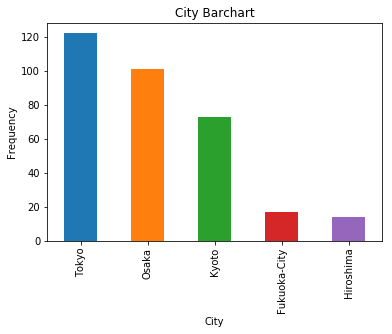

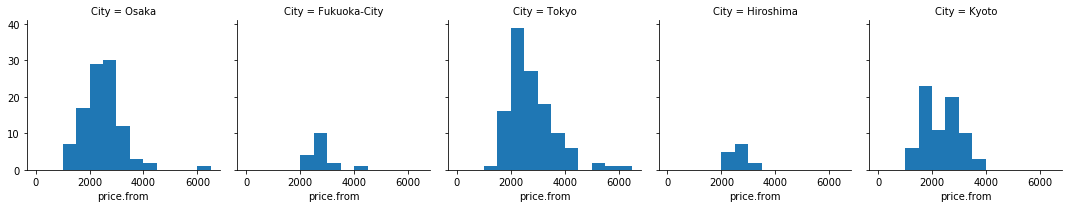

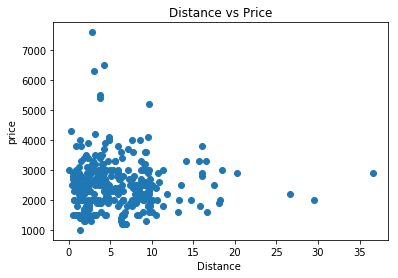

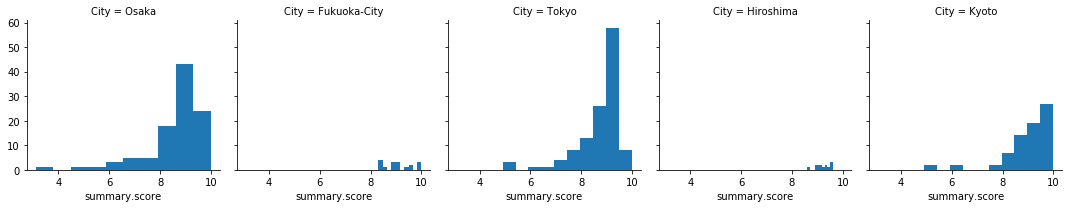

population mean = 2501.223241590214
sample mean= 2502.5
sample std= 673.8665697644852
0.1800739119889217


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np
import seaborn as sns
import statistics as st
from scipy.stats import norm
import re
df=pd.read_csv("Copy of hostel_dataset.csv")

# cleaning the distance column

def isfloat(value):
    try:
            float(value)
            return True
    except:
            return False
for index,row in df.Distance.iteritems():
    y=re.split("[km|' ']",row)
    if(isfloat(row)):
        df.Distance.loc[index]=float(row)
    else:
        if(isfloat(y[0])):
            df.Distance.loc[index]=float(y[0])
        else:
            df.Distance.loc[index]=np.NaN

#removing the rows which complitly contains NaN
df=df[np.isfinite(df['facilities'])]
#cleaning longitude column
df.lon=df.lon.fillna(np.mean(df.lon))
#cleaning latitude column
df.lat=df.lat.fillna(np.mean(df.lat))
#cleaning catogorical coloumn(rating.band)
for index,row in df['rating.band'].iteritems():
    if(row=='Rating'):
        df['rating.band'].loc[index]=df['rating.band'].loc[index-1]
        
        
#graph visualisation
df.City.value_counts().plot(kind="bar")
plt.xlabel('City')
        
plt.ylabel('Frequency')
plt.title('City Barchart')
plt.show()


#price analysis
grid = sns.FacetGrid(df, col='City')
grid.map(plt.hist, 'price.from',bins=[0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500])
plt.show()


#location analysis
plt.scatter(df.Distance, df["price.from"])
plt.xlabel('Distance ')
plt.ylabel('price')
plt.title('Distance vs Price')
plt.show()


#rating analysis
grid = sns.FacetGrid(df, col='City')
grid.map(plt.hist,'summary.score')
plt.show()


#hypothesis testing for price coloumn.we would like to determine if the price for one night stay in hostel have a mean greater than 2600 taking alpha as 0.05

pop_mean=np.mean(df['price.from'])
print("population mean =",pop_mean)

#taking a random sample of size 40
sample_size=40
x = df['price.from'].sample(sample_size)
sample_mean=np.mean(x)
print("sample mean=",sample_mean)
sample_std=np.std(x,ddof=1)
sample_std1=sample_std/(40**0.5)
print("sample std=",sample_std)
#null hypothesis is H0: mue<=2600 and alternate hypothesis is H1: mue>2600 
#sample_mean~N(2600,633**2)
p_value=norm.cdf(sample_mean,2600,sample_std1)
print(p_value)












        
